IMPORTING LIBRARIES

In [ ]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING DATASET

**Data source:** https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

> This dataset contains about 10 years of daily weather observations from many locations across Australia.
> RainTomorrow is the target variable to predict. It means -- Will it rain the next day, Yes or No?
This column is Yes if the rain for that day was 1mm or more.


> The dataset contains the following columns:
*  Date: The date of observation
*  Location: The common name of the location of the weather station
*  MinTemp: The minimum temperature in degrees celsius
*  MaxTemp: The maximum temperature in degrees celsius
*  Rainfall: The amount of rainfall recorded for the day in mm
*  Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
*  Sunshine: The number of hours of bright sunshine in the day
*  WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
*  WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
*  WindDir9am: Direction of the wind at 9am
*  WindDir3pm: Direction of the wind at 3pm
*  WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
*  WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
*  Humidity9am: Humidity (percent) at 9am
*  Humidity3pm: Humidity (percent) at 3pm
*  Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
*  Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
*  Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths
*  Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm
*  Temp9am: Temperature (degrees C) at 9am
*  Temp3pm: Temperature (degrees C) at 3pm
*  RainToday: (Boolean) 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
*  RainTomorrow: The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk"


**Aim:** To predict whether or not it will rain tomorrow in Australia.
> I have implemented various classification ML models like Logistic Regression, kNN, Decision Tree, Random Forest, Bagging, and XGBoost using Scikit-Learn for this purpose.

In [ ]:
# Loading dataset
data = pd.read_csv("/content/data.csv")
data.head()

<ipython-input-2-333484c2e9c4>:2: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/data.csv")


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,"23 columns: 1 response, 22 predictors",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,NaN,multicollinearity,NaN,2.0,NaN,NaN,NaN,NaN,NaN
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,not in use,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,NaN,NaN,categorical column with 16 factors arising fro...,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [ ]:
# Dropping unnecessary extra columns present in the csv file
data = data.drop(['Unnamed: 23',	'Unnamed: 24',	'Unnamed: 25',	'Unnamed: 26',	'Unnamed: 27',	'Unnamed: 28',	'Unnamed: 29',	'Unnamed: 30',	'Unnamed: 31',	'Unnamed: 32'], axis=1)

EXPLORATORY DATA ANALYSIS

In [ ]:
data.shape

(145460, 23)

Observation:
*   The original dataset has 145460 rows and 23 columns



In [ ]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Observation:
*   Most columns in the dataset contain null values
*   The columns of are of two datatypes: numerical (float64) and categorical (object)





In [ ]:
data.describe(exclude='object')

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
data.describe(include='object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,12-11-2013,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [ ]:
# Check for missing values in the Target Variable 'RainTomorrow'
data['RainTomorrow'].isna().sum()

3267

In [ ]:
# Viewing the rows having empty Target Variable 'RainTomorrow'
data[data['RainTomorrow'].isna()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,15-12-2008,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,...,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,10-09-2009,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,...,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,09-02-2010,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,...,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,11-02-2010,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,...,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,17-02-2010,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,...,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,07-02-2016,Uluru,22.5,37.7,0.0,NaN,NaN,SE,50.0,SE,...,22.0,11.0,1012.6,1009.6,NaN,NaN,28.8,37.2,No,NaN
145091,22-06-2016,Uluru,12.3,19.1,0.0,NaN,NaN,NaN,NaN,NaN,...,79.0,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,No,NaN
145092,23-06-2016,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,...,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN
145335,21-02-2017,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,...,23.0,11.0,1013.7,1008.4,NaN,NaN,25.2,34.4,No,NaN


Since including the rows having empty target variables does not make sense or add value to our data, such rows can be removed.

In [ ]:
# Drop the rows having empty Target Variable
data.dropna(subset=['RainTomorrow'], inplace=True)

In [ ]:
data['RainTomorrow'].isna().sum()

0

In [ ]:
data.shape

(142193, 23)

Observation:
*   The dataset after removing the rows with null target variable contains 142193 rows and 23 columns



In [ ]:
data['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [ ]:
round(data['RainTomorrow'].value_counts()/len(data), 4)

No     0.7758
Yes    0.2242
Name: RainTomorrow, dtype: float64

Observations:
*   It can be seen that the classes of target variable are moderately imbalanced
*   This is handled later during training of models by balancing the class weights, so that each class contributes equally to the model.



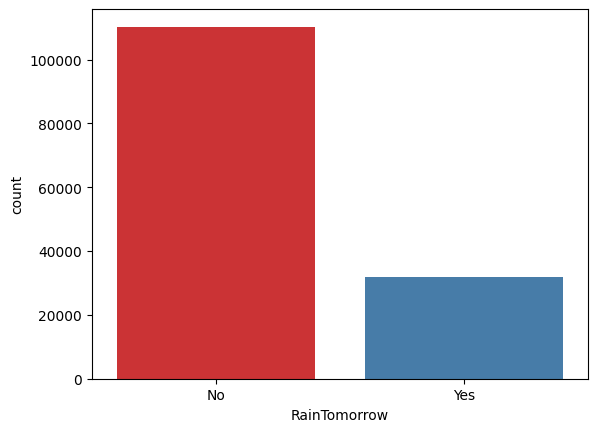

In [ ]:
# Visualization of Target Variable
sns.countplot(x='RainTomorrow', data=data, palette='Set1')
plt.show()

In [ ]:
# Categorical variables in Dataset:
categorical_variables = [column for column in data.columns if data[column].dtype == 'O']
categorical_variables

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
# Numerical variables in Dataset:
numerical_variables = [column for column in data.columns if data[column].dtype != 'O']
numerical_variables

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
data.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          679
Evaporation       356
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
# Percentage of null values in each column arranged in descending order
null_count = data.isnull().sum().sort_values(ascending=False)
null_percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([null_count, null_percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Sunshine,67816,0.476929
Evaporation,60843,0.427890
Cloud3pm,57094,0.401525
Cloud9am,53657,0.377353
Pressure9am,14014,0.098556
Pressure3pm,13981,0.098324
WindDir9am,10013,0.070418
WindGustDir,9330,0.065615
WindGustSpeed,9270,0.065193
WindDir3pm,3778,0.026570


Observations:
*   Columns like Sunshine, Evaporation, Cloud3pm, Cloud9am have more high percentages of missing values (>35%)



In [ ]:
# Dropping columns where missing data is >35%
# Since the 'Date' and 'Location' columns are not necessary in the determination of overall 'RainTomorrow' in Australia, they can be dropped
data.drop(columns=['Date', 'Location', 'Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'], axis=1, inplace=True)
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [ ]:
# Shape of dataset after dropping the columns 'Date', 'Location', 'Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'
data.shape

(142193, 17)

In [ ]:
# Updated Categorical variables in Dataset:
categorical_variables = [column for column in data.columns if data[column].dtype == 'O']
categorical_variables

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [ ]:
# Updated Numerical variables in Dataset:
numerical_variables = [column for column in data.columns if data[column].dtype != 'O']
numerical_variables

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

<ipython-input-26-11a6d53893b5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


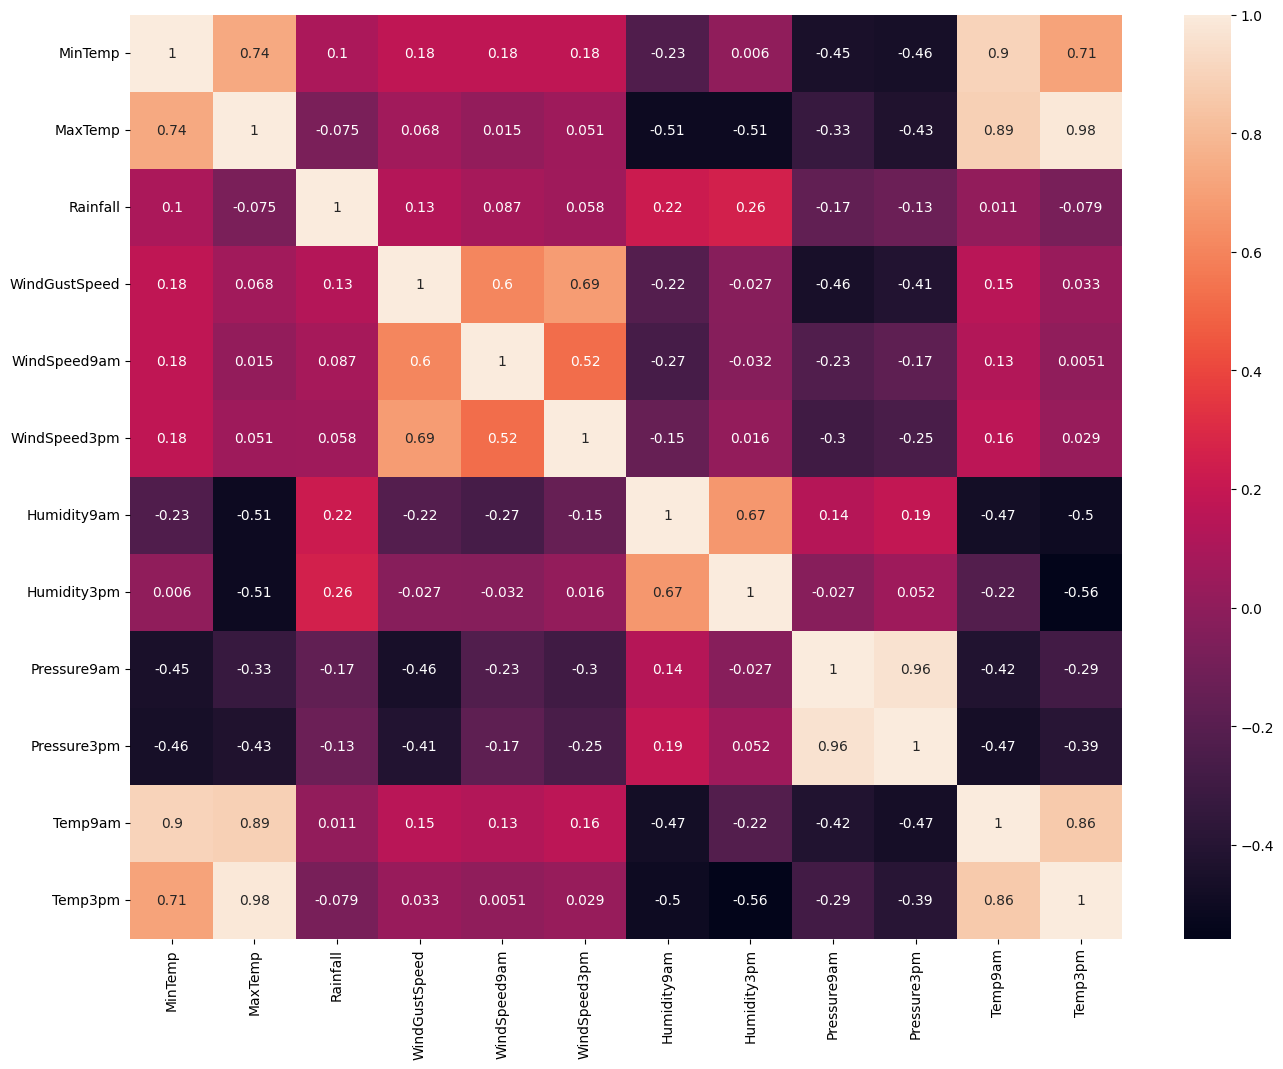

In [ ]:
# Plot correlation matrix for the numerical features
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
sns.pairplot(data[numerical_variables], kind='scatter', diag_kind='hist')
plt.show()

<Axes: xlabel='Temp3pm'>

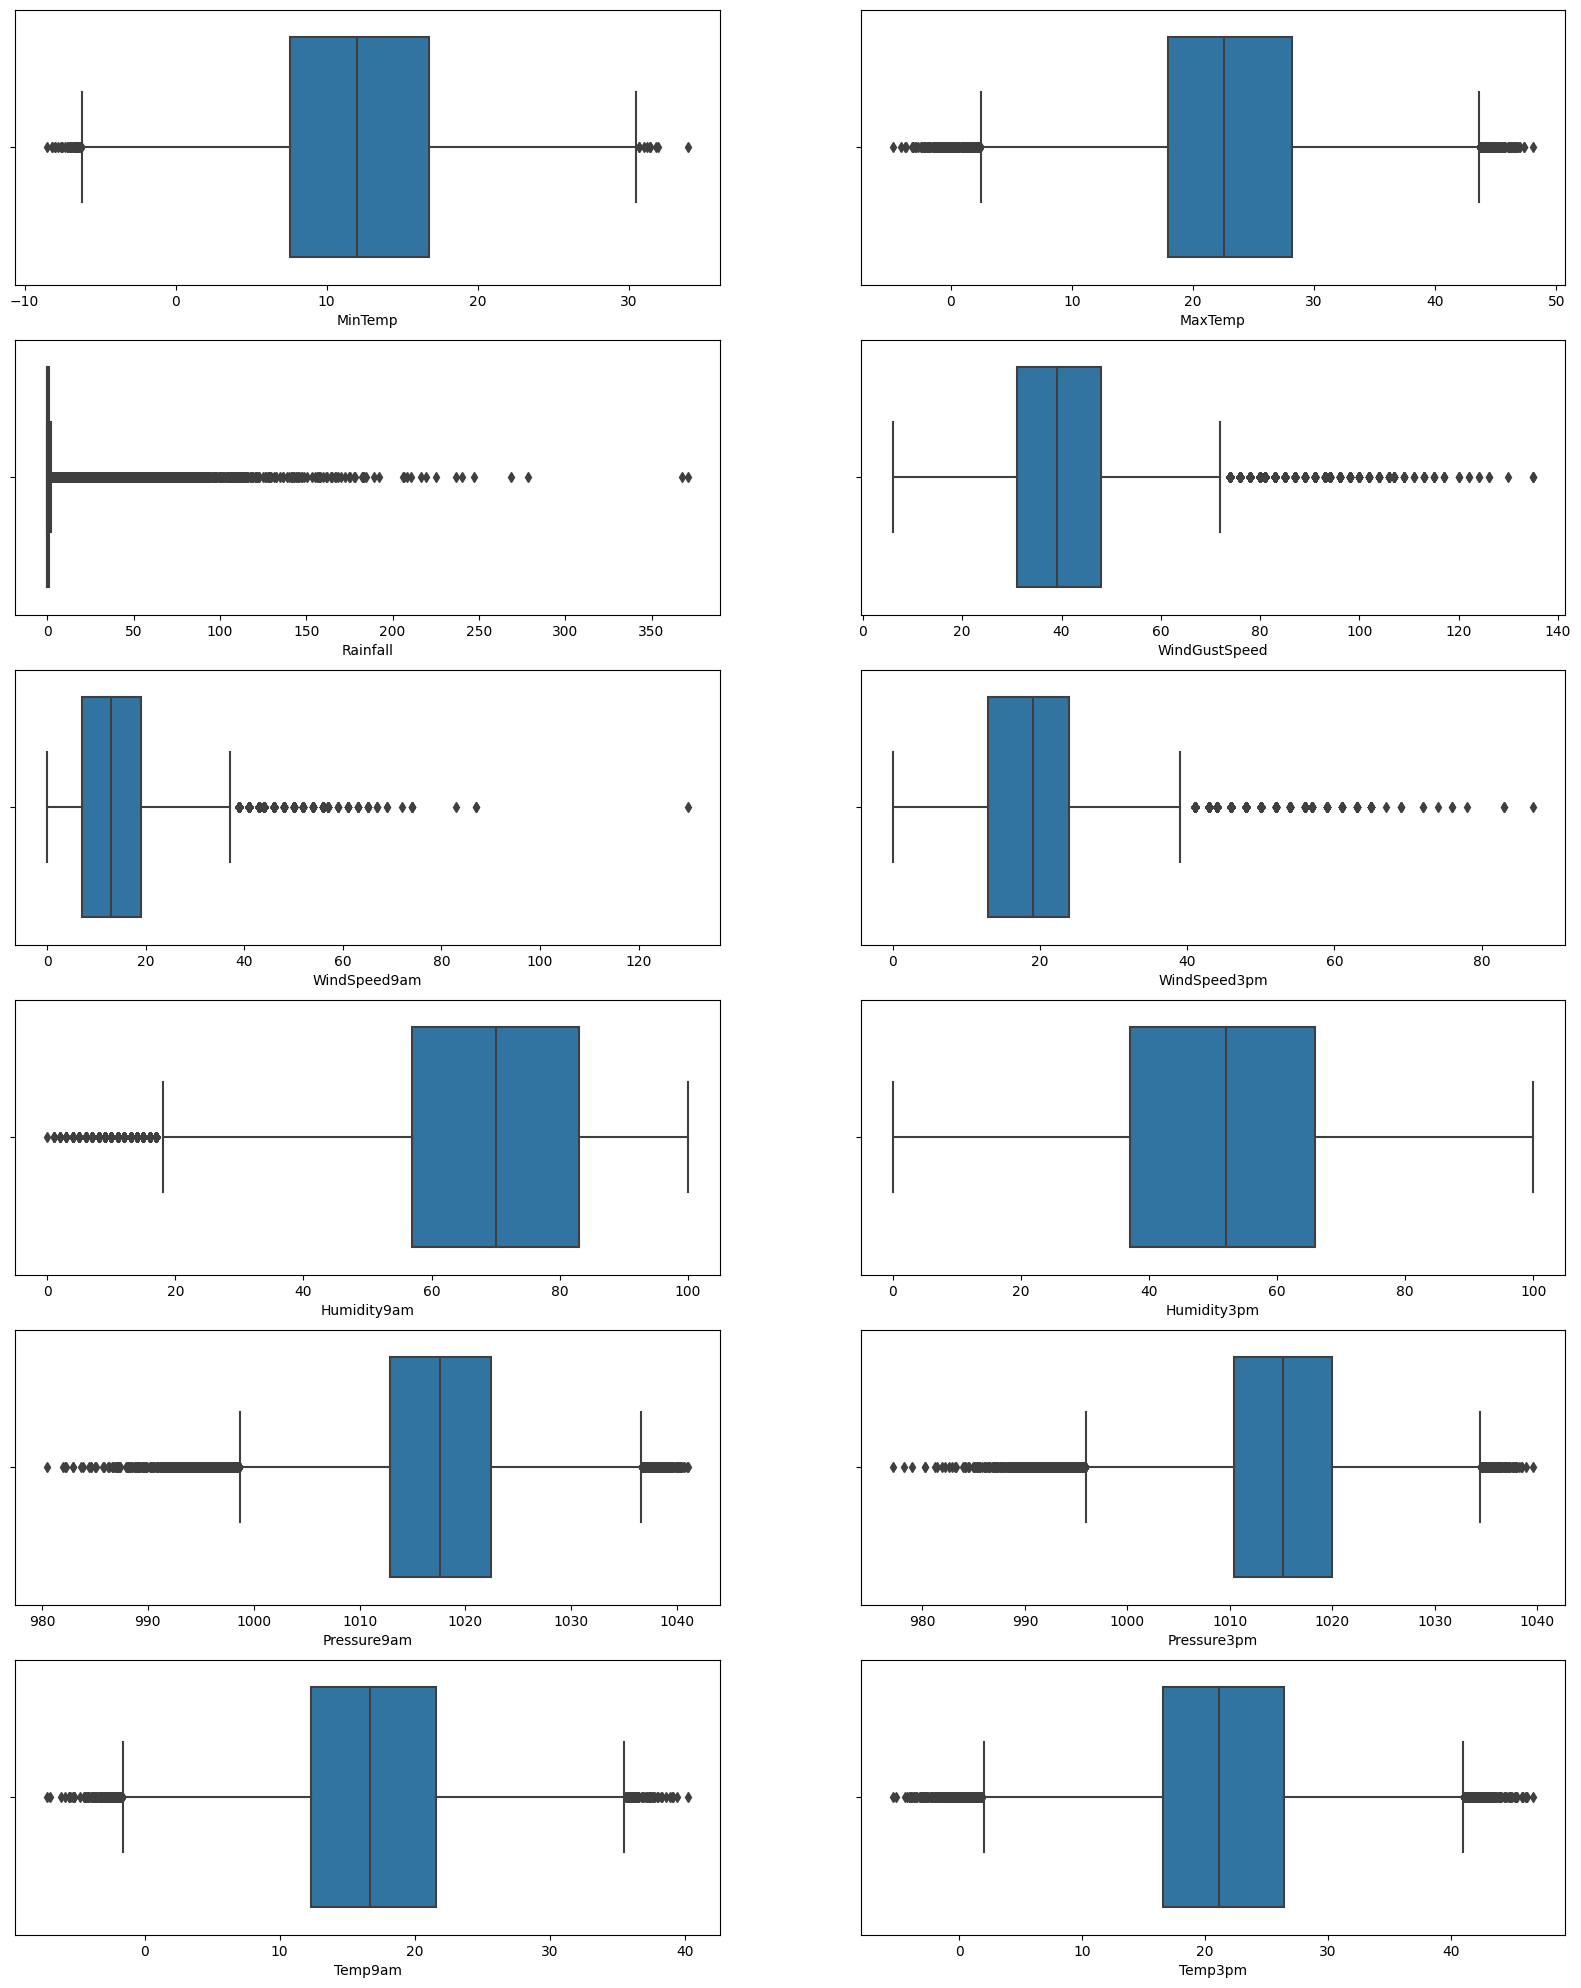

In [ ]:
fig, axes = plt.subplots(6, 2, figsize=(20, 25))

sns.boxplot(ax=axes[0, 0], data=data, x='MinTemp', )
sns.boxplot(ax=axes[0, 1], data=data, x='MaxTemp')
sns.boxplot(ax=axes[1, 0], data=data, x='Rainfall')
sns.boxplot(ax=axes[1, 1], data=data, x='WindGustSpeed')
sns.boxplot(ax=axes[2, 0], data=data, x='WindSpeed9am')
sns.boxplot(ax=axes[2, 1], data=data, x='WindSpeed3pm')
sns.boxplot(ax=axes[3, 0], data=data, x='Humidity9am')
sns.boxplot(ax=axes[3, 1], data=data, x='Humidity3pm')
sns.boxplot(ax=axes[4, 0], data=data, x='Pressure9am')
sns.boxplot(ax=axes[4, 1], data=data, x='Pressure3pm')
sns.boxplot(ax=axes[5, 0], data=data, x='Temp9am')
sns.boxplot(ax=axes[5, 1], data=data, x='Temp3pm')

In [ ]:
data[numerical_variables].describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235
std,6.403283,7.117618,8.465173,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


Observations:
*   From the boxplots, it can be seen that the features Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm contain significant outliers



<Axes: xlabel='WindSpeed3pm', ylabel='Count'>

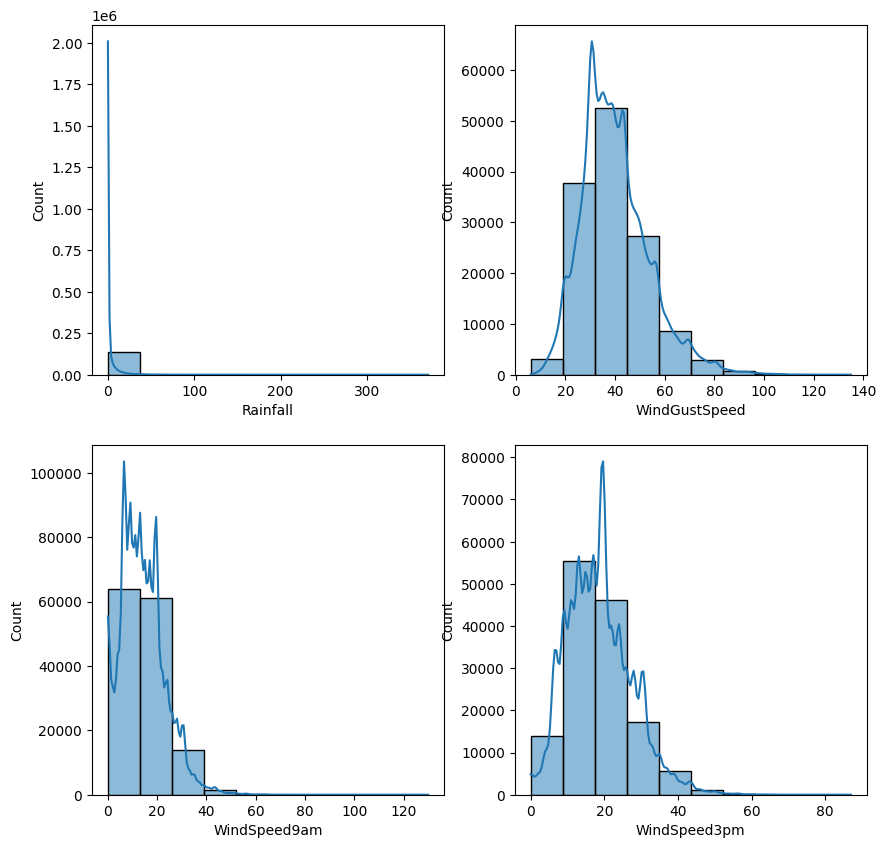

In [ ]:
# Plot histograms for these features to see if they are the columns Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm are normal or skewed
fig,axs = plt.subplots(2,2, figsize = (10,10))

sns.histplot(data=data, x='Rainfall', kde=True, ax=axs[0, 0], bins=10)
sns.histplot(data=data, x='WindGustSpeed', kde=True, ax=axs[0, 1], bins=10)
sns.histplot(data=data, x='WindSpeed9am', kde=True, ax=axs[1, 0], bins=10)
sns.histplot(data=data, x='WindSpeed3pm', kde=True, ax=axs[1, 1], bins=10)

Observations:
*   As suspected, all four features have highly skewed distributions
*   This indicates the presence of outliers in these features



In [ ]:
# Determining the outliers using Interquartile range
for feature in ['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
  IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)
  Lower_limit = data[feature].quantile(0.25) - (IQR * 3)
  Upper_limit = data[feature].quantile(0.75) + (IQR * 3)
  print(f'{feature} outliers are values < {Lower_limit} or > {Upper_limit}')

Rainfall outliers are values < -2.4000000000000004 or > 3.2
WindGustSpeed outliers are values < -20.0 or > 99.0
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


ASSIGNING FEATURES AND TARGET VARIABLE

In [ ]:
X = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']

print(X)
print(y)

        MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0          13.4     22.9       0.6           W           44.0          W   
1           7.4     25.1       0.0         WNW           44.0        NNW   
2          12.9     25.7       0.0         WSW           46.0          W   
3           9.2     28.0       0.0          NE           24.0         SE   
4          17.5     32.3       1.0           W           41.0        ENE   
...         ...      ...       ...         ...            ...        ...   
145454      3.5     21.8       0.0           E           31.0        ESE   
145455      2.8     23.4       0.0           E           31.0         SE   
145456      3.6     25.3       0.0         NNW           22.0         SE   
145457      5.4     26.9       0.0           N           37.0         SE   
145458      7.8     27.0       0.0          SE           28.0        SSE   

       WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0           

SPLITTING THE DATA INTO TRAINING SET AND TESTING SET

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
113462,13.9,22.6,0.2,S,41.0,SSE,S,20.0,28.0,65.0,55.0,1013.9,1013.4,18.8,20.4,No
89638,22.4,29.4,2.0,ENE,33.0,SSE,NaN,7.0,NaN,71.0,59.0,1016.9,1013.1,26.4,27.5,Yes
138130,9.7,36.2,0.0,E,31.0,NE,N,15.0,11.0,6.0,2.0,1018.1,1013.6,28.5,35.0,No
87898,20.5,30.1,0.0,ESE,37.0,SSE,E,22.0,19.0,59.0,53.0,1014.1,1010.8,27.3,29.4,No
16484,16.8,29.2,0.0,NaN,NaN,NaN,SE,0.0,7.0,72.0,53.0,NaN,NaN,22.2,27.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43204,9.4,17.6,0.0,SSW,35.0,ENE,E,7.0,17.0,62.0,80.0,1022.2,1019.9,16.3,16.2,No
100206,1.2,20.2,0.0,N,33.0,NE,NW,13.0,13.0,69.0,33.0,1022.0,1017.9,11.2,19.7,No
98494,11.9,17.6,1.2,WSW,39.0,SW,WSW,13.0,20.0,67.0,38.0,1022.2,1022.8,14.5,17.1,Yes
120883,7.7,26.0,0.0,SSE,31.0,SE,SE,11.0,13.0,58.0,25.0,1025.5,1023.0,14.4,24.6,No


In [ ]:
X_test

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
88578,17.4,29.0,0.0,NNE,33.0,SE,NNE,11.0,19.0,63.0,61.0,1013.1,1008.9,26.1,27.8,No
59016,6.8,14.4,0.8,S,46.0,SW,S,17.0,22.0,80.0,55.0,1010.2,1012.4,10.4,12.7,No
127049,10.1,15.4,14.6,WSW,31.0,SW,SSE,13.0,9.0,70.0,61.0,1014.4,1016.1,12.3,13.0,Yes
120886,14.4,33.4,0.0,SW,41.0,ESE,SW,9.0,17.0,40.0,23.0,1019.2,1016.6,23.0,32.3,No
136649,6.8,14.3,10.0,E,28.0,ENE,ESE,15.0,13.0,92.0,47.0,1027.6,1024.4,7.3,13.7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35984,16.3,23.8,0.0,S,37.0,S,SE,24.0,26.0,57.0,40.0,1022.6,1020.9,19.8,23.4,No
49843,17.2,24.8,0.8,WNW,43.0,WNW,NW,20.0,17.0,52.0,38.0,1002.7,1005.6,22.9,22.2,No
134857,7.2,23.6,0.0,NW,31.0,NE,NNW,2.0,17.0,57.0,36.0,1027.0,1024.5,13.7,22.6,No
92324,20.4,27.5,0.0,ENE,33.0,SSE,ENE,17.0,19.0,90.0,76.0,1018.9,1017.1,21.8,23.6,No


In [ ]:
y_train

113462     No
89638      No
138130     No
87898      No
16484     Yes
         ... 
43204      No
100206     No
98494      No
120883     No
44785     Yes
Name: RainTomorrow, Length: 113754, dtype: object

Observations:
*   Training data and testing data are split in the ratio of 80:20
*   Training data has 113754 data points, while testing data has 28439 data points



HANDLING MISSING DATA

In [ ]:
# Numerical features:
numerical_features = [column for column in X.columns if data[column].dtype != 'O']
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
# Categorical features:
categorical_features = [column for column in X.columns if data[column].dtype == 'O']
categorical_features

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

Imputation of missing values


> While imputing missing values, common ways of imputing are using mean and median in place of missing values. Mean is preferred when the features are distributed normally, whereas median is preferred when the features have skewed distributions.


> Since the numerical features in this dataset are mostly skewed, median is a more suitable statistic for imputation.

Imputation technqiue


> One main risk while imputing missing values is the possibility of data leakage from testing data to training data


> To avoid this, imputation should be done over the training set first, and then propagated to the test set. The statistics to be used to impute the missing values both in train and test stes, should be extracted from the training set only.


> Thus, imputation is done after splitting into train and test sets, inorder to avoid overfittiing. If imputation is done before splitting, the information from the test set influences the training process, which would make the model oversee the test data as well and give unreliable results.

Source: https://stats.stackexchange.com/questions/95083/imputation-before-or-after-splitting-into-train-and-test






In [ ]:
# Filling the missing values for numerical features in train and test sets with the median from training data
for df in [X_train, X_test]:
  for feature in numerical_features:
    df[feature] = df[feature].fillna(X_train[feature].median())

In [ ]:
# Filling the missing values for categorical features in train and test sets with the mode from training data
for df in [X_train, X_test]:
  for feature in categorical_features:
    df[feature] = df[feature].fillna(X_train[feature].mode()[0])

In [ ]:
X_train.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [ ]:
X_test.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

Obervations:
*   There are no more missing values in both the train and test sets



TREATING OUTLIERS

Extreme outliers in the four features are treated by removing the rows corresponding to the outliers for each feature. For this, 3 Sigma rule is employed, where the outer 0.3% values are considered outliers, and the rest of the 99.7% data is within the range.



In [ ]:
# sns.boxplot(data=X_train, x='Rainfall')
# plt.title("Box Plot before Outlier Removal for Rainfall in X_train")
# plt.show()
# sns.boxplot(data=X_train, x='WindSpeed9am')
# plt.title("Box Plot before Outlier Removal for WindSpeed9am in X_train")
# plt.show()

for feature in ['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
  IQR = X_train[feature].quantile(0.75) - X_train[feature].quantile(0.25)
  Lower_limit = X_train[feature].quantile(0.25) - (IQR * 3)
  Upper_limit = X_train[feature].quantile(0.75) + (IQR * 3)

  X_train = X_train[(X_train[feature] >= Lower_limit) & (X_train[feature] <= Upper_limit)]
  y_train = y_train.loc[X_train.index]

print("X_train without outliers:")
print(X_train)
print("\ny_train without outliers:")
print(y_train)

# sns.boxplot(data=X_train, x='Rainfall')
# plt.title("Box Plot after Outlier Removal for Rainfall in X_train")
# plt.show()
# sns.boxplot(data=X_train, x='WindSpeed9am')
# plt.title("Box Plot after Outlier Removal for WindSpeed9am in X_train")
# plt.show()

for feature in ['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
  IQR = X_test[feature].quantile(0.75) - X_test[feature].quantile(0.25)
  Lower_limit = X_test[feature].quantile(0.25) - (IQR * 3)
  Upper_limit = X_test[feature].quantile(0.75) + (IQR * 3)

  X_test = X_test[(X_test[feature] >= Lower_limit) & (X_test[feature] <= Upper_limit)]
  y_test = y_test.loc[X_test.index]

print("\nX_test without outliers:")
print(X_test)
print("\ny_test without outliers:")
print(y_test)

X_train without outliers:
        MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
113462     13.9     22.6       0.2           S           41.0        SSE   
89638      22.4     29.4       2.0         ENE           33.0        SSE   
138130      9.7     36.2       0.0           E           31.0         NE   
87898      20.5     30.1       0.0         ESE           37.0        SSE   
16484      16.8     29.2       0.0           W           39.0          N   
...         ...      ...       ...         ...            ...        ...   
43204       9.4     17.6       0.0         SSW           35.0        ENE   
100206      1.2     20.2       0.0           N           33.0         NE   
98494      11.9     17.6       1.2         WSW           39.0         SW   
120883      7.7     26.0       0.0         SSE           31.0         SE   
44785      20.0     31.5       0.0         WNW           63.0        WNW   

       WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  H

In [ ]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000
mean,11.987881,23.804181,0.185801,38.853305,13.539934,18.289011,66.289496,48.456806,1018.237013,1015.625888,17.172045,22.252494
std,6.450786,7.065884,0.468002,12.269022,8.521961,8.442979,18.770398,19.701323,6.461973,6.481916,6.525060,6.816824
min,-8.200000,-2.700000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,983.700000,980.200000,-5.600000,-4.000000
25%,7.300000,18.500000,0.000000,31.000000,7.000000,13.000000,55.000000,34.000000,1014.200000,1011.500000,12.500000,17.300000
50%,11.900000,23.300000,0.000000,39.000000,13.000000,17.000000,67.000000,49.000000,1017.600000,1015.200000,16.900000,21.600000
75%,16.600000,28.800000,0.000000,46.000000,19.000000,24.000000,79.000000,62.000000,1022.300000,1019.700000,21.800000,26.900000
max,33.900000,48.100000,2.400000,91.000000,54.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


In [ ]:
X_test.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,23666.000000,23666.000000,23666.000000,23666.000000,23666.000000,23666.000000,23666.000000,23666.000000,23666.000000,23666.000000,23666.000000,23666.000000
mean,11.990522,23.792851,0.186022,39.079861,13.600947,18.369898,66.241528,48.432054,1018.259790,1015.654230,17.169724,22.228775
std,6.461583,7.135646,0.468062,12.463011,8.644949,8.487621,18.734645,19.764954,6.527558,6.535327,6.568706,6.899394
min,-8.500000,-4.100000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,985.800000,984.000000,-3.400000,-4.400000
25%,7.400000,18.600000,0.000000,31.000000,7.000000,13.000000,55.000000,34.000000,1014.200000,1011.500000,12.400000,17.300000
50%,11.900000,23.300000,0.000000,39.000000,13.000000,19.000000,67.000000,49.000000,1017.600000,1015.200000,16.900000,21.500000
75%,16.700000,28.800000,0.000000,46.000000,19.000000,24.000000,79.000000,62.000000,1022.300000,1019.700000,21.800000,26.900000
max,31.400000,46.700000,2.400000,91.000000,54.000000,57.000000,100.000000,100.000000,1040.900000,1038.200000,39.100000,46.100000


FORMATTING THE DATA: ONE-HOT ENCODING

In [ ]:
# Mapping the classes of traget variable: "Yes" as 1, and "No" as 0
y_train = y_train.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})

In [ ]:
y_train.head()

113462    0
89638     0
138130    0
87898     0
16484     1
Name: RainTomorrow, dtype: int64

In [ ]:
y_test.head()

88578     0
59016     0
120886    0
139821    0
78081     1
Name: RainTomorrow, dtype: int64

In [ ]:
# One Hot Encoding by creating dummy variables for the catergorical features of training data
X_train = pd.get_dummies(X_train, columns = categorical_features)
X_train.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
113462,13.9,22.6,0.2,41.0,20.0,28.0,65.0,55.0,1013.9,1013.4,...,1,0,0,0,0,0,0,0,1,0
89638,22.4,29.4,2.0,33.0,7.0,19.0,71.0,59.0,1016.9,1013.1,...,0,1,0,0,0,0,0,0,0,1
138130,9.7,36.2,0.0,31.0,15.0,11.0,6.0,2.0,1018.1,1013.6,...,0,0,0,0,0,0,0,0,1,0
87898,20.5,30.1,0.0,37.0,22.0,19.0,59.0,53.0,1014.1,1010.8,...,0,0,0,0,0,0,0,0,1,0
16484,16.8,29.2,0.0,39.0,0.0,7.0,72.0,53.0,1017.6,1015.2,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
# One Hot Encoding by creating dummy variables for the catergorical features of tetsing data
X_test = pd.get_dummies(X_test, columns = categorical_features)
X_test.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
88578,17.4,29.0,0.0,33.0,11.0,19.0,63.0,61.0,1013.1,1008.9,...,0,0,0,0,0,0,0,0,1,0
59016,6.8,14.4,0.8,46.0,17.0,22.0,80.0,55.0,1010.2,1012.4,...,1,0,0,0,0,0,0,0,1,0
120886,14.4,33.4,0.0,41.0,9.0,17.0,40.0,23.0,1019.2,1016.6,...,0,0,0,0,1,0,0,0,1,0
139821,19.3,29.9,0.0,43.0,26.0,17.0,44.0,37.0,1015.9,1012.1,...,0,0,0,0,0,0,0,0,1,0
78081,17.9,25.8,0.0,44.0,17.0,19.0,56.0,99.0,1014.4,1014.9,...,0,0,0,1,0,0,0,0,1,0


FEATURE SCALING

Since there is a huge difference in the range of values of numerical features, feature scaling needs to be done. Normalization is used to set all the features in the range of 0 to 1, by doing (X - X_min)/(X_max - X_min)



Source: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/h-what-is-feature-scaling

In [ ]:
# Normalization:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [ ]:
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns)

In [ ]:
X_train_norm.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
count,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,...,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000,94782.000000
mean,0.479522,0.521736,0.077417,0.386509,0.250740,0.320860,0.662895,0.484568,0.602740,0.596395,...,0.064527,0.101201,0.063071,0.051961,0.061288,0.064970,0.057722,0.061626,0.932413,0.067587
std,0.153225,0.139092,0.195001,0.144341,0.157814,0.148122,0.187704,0.197013,0.112774,0.109123,...,0.245691,0.301596,0.243092,0.221950,0.239859,0.246474,0.233218,0.240476,0.251037,0.251037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.368171,0.417323,0.000000,0.294118,0.129630,0.228070,0.550000,0.340000,0.532286,0.526936,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.477435,0.511811,0.000000,0.388235,0.240741,0.298246,0.670000,0.490000,0.591623,0.589226,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.589074,0.620079,0.000000,0.470588,0.351852,0.421053,0.790000,0.620000,0.673647,0.664983,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# # Standardization:
# from sklearn.preprocessing import StandardScaler

# # copy of datasets
# X_train_stand = X_train.copy()
# X_test_stand = X_test.copy()

# # apply standardization on numerical features
# for feature in numerical_features:

#     # fit on training data column
#     stand = StandardScaler()

#     # transform the training data column
#     X_train_stand[feature] = stand.fit_transform(X_train_stand[[feature]])

#     # transform the testing data column
#     X_test_stand[feature] = stand.transform(X_test_stand[[feature]])

In [ ]:
# X_train_stand = pd.DataFrame(X_train_stand, columns=X_train.columns)
# X_test_stand = pd.DataFrame(X_test_stand, columns=X_test.columns)
# X_train_stand.describe()

TRAINING MODELS

In [ ]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score
from sklearn.model_selection import GridSearchCV

1. Logistic Regression

In [ ]:
# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train_norm,y_train)
y_pred = logreg.predict(X_test_norm)

#Checking different metrics for Logistic Regression model
print('Checking different metrics for 1. Logistic Regression model:\n')
print("Training accuracy: ",logreg.score(X_train_norm,y_train))

acc_score = accuracy_score(y_test, y_pred)
print('Testing accuracy: ',acc_score)

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',conf_mat)

roc_auc = roc_auc_score(y_test,y_pred)
print('ROC AUC score: ',roc_auc)

class_rep = classification_report(y_test,y_pred)
print('Classification Report: \n',class_rep)

Checking different metrics for 1. Logistic Regression model:

Training accuracy:  0.8601844232027178
Testing accuracy:  0.8622918955463534
Confusion Matrix: 
 [[19081   614]
 [ 2645  1326]]
ROC AUC score:  0.6513727507419398
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     19695
           1       0.68      0.33      0.45      3971

    accuracy                           0.86     23666
   macro avg       0.78      0.65      0.68     23666
weighted avg       0.85      0.86      0.84     23666



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Observations:
*   Training accuracy and testing accuracy almost same
*   Can conclude there is no overfitting or underfitting
*   Good generalization
*   The logistion regression model is not overly complex to fit noise in the training data, and it's not overly simplistic to fail in capturing the underlying patterns



In [ ]:
# Creating a list for hyper parameter
parameters = {'C' : [100, 10, 1.0, 0.1, 0.01],
              'penalty' : ['l2']}

#Applying GridSearchCV to get the best value for hyperparameters
grid = GridSearchCV(logreg, parameters, cv = 5, verbose = 1, n_jobs = -1)
best = grid.fit(X_train_norm, y_train)

#Printing the best hyperparameters
print('The best hyper parameters are: \n',grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
The best hyper parameters are: 
 {'C': 100, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Fitting the Logistic Regression model with the best hyper parameters obtained through GridSearchCV
best_logreg = LogisticRegression(C=100, penalty='l2', class_weight='balanced')
best_logreg.fit(X_train_norm,y_train)
y_pred = best_logreg.predict(X_test_norm)

#Checking different metrics for Logistic Regression model after tuning the hyperparameters
print('Checking different metrics for Logistic Regression model after hyperparameter tuning:\n')
print("Training accuracy: ",best_logreg.score(X_train_norm,y_train))

acc_score = accuracy_score(y_test, y_pred)
print('Testing accuracy: ',acc_score)

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',conf_mat)

roc_auc = roc_auc_score(y_test,y_pred)
print('ROC AUC score: ',roc_auc)

class_rep = classification_report(y_test,y_pred)
print('Classification Report: \n',class_rep)

Checking different metrics for Logistic Regression model after hyperparameter tuning:

Training accuracy:  0.7637948133611867
Testing accuracy:  0.7654440970168174
Confusion Matrix: 
 [[15178  4517]
 [ 1034  2937]]
ROC AUC score:  0.7551323191130108
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.77      0.85     19695
           1       0.39      0.74      0.51      3971

    accuracy                           0.77     23666
   macro avg       0.67      0.76      0.68     23666
weighted avg       0.85      0.77      0.79     23666



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Observations:
*   Logistic Regression is not very sensitive to changing hyperparameters
*   After Hyperparameter Tuning and removing the Class Imbalance -



> 1.   **Training and Testing Accuracy:**
 - The training accuracy has decreased after hyperparameter tuning, so the model may be less overfit to the training data. However, the testing accuracy has also decreased, indicating a trade-off between overfitting and generalization. -
2.   **Confusion Matrix:**
 - After tuning, there is a decrease in true negatives and an increase in false positives.
3. **ROC AUC Score:**
 - The ROC AUC score has increased after hyperparameter tuning, so the model is able to discriminate between the two classes better.
4. **Precision, Recall, and F1-Score:**
 - Precision, recall, and F1-score for both classes show changes. The model after hyperparameter tuning achieves higher recall for the minority class (class 1) at the cost of lower precision.



2. Decision Tree Classifier

In [ ]:
# Fitting a Decision Tree Classifier with default hyper parameters
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train_norm,y_train)
y_pred = dt.predict(X_test_norm)

#Checking different metrics for decision tree model with default hyper parameters
print('Checking different metrics for decision tree model with default hyper parameters:\n')
print("Training accuracy: ",dt.score(X_train_norm,y_train))

acc_score = accuracy_score(y_test, y_pred)
print('Testing accuracy: ',acc_score)

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',conf_mat)

roc_auc = roc_auc_score(y_test,y_pred)
print('ROC AUC score: ',roc_auc)

class_rep = classification_report(y_test,y_pred)
print('Classification Report: \n',class_rep)

Checking different metrics for decision tree model with default hyper parameters:

Training accuracy:  0.9999155957882299
Testing accuracy:  0.8044029409279134
Confusion Matrix: 
 [[17307  2388]
 [ 2241  1730]]
ROC AUC score:  0.6572047381597311
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88     19695
           1       0.42      0.44      0.43      3971

    accuracy                           0.80     23666
   macro avg       0.65      0.66      0.65     23666
weighted avg       0.81      0.80      0.81     23666



Hyperparameter Tuning of Decision Tree model

In [ ]:
#Creating a dictionary for the hyper parameters
parameters = {'max_depth':[5,10,15],
              'min_samples_leaf':[5,10,15],
              'min_samples_split':[5,10,15]
              }

#Applying GridSearchCV to get the best value for hyperparameters
grid = GridSearchCV(dt, parameters, cv = 5, verbose = 1, n_jobs = -1)
best = grid.fit(X_train_norm, y_train)

#Printing the best hyperparameters
print('The best hyper parameters are: \n',grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
The best hyper parameters are: 
 {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [ ]:
#Fitting the decision tree model with the best hyper parameters obtained through GridSearchCV
best_dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5,min_samples_split=5, class_weight='balanced')
best_dt.fit(X_train_norm,y_train)
y_pred = best_dt.predict(X_test_norm)

#Checking different metrics for decision tree model after tuning the hyperparameters
print('Checking different metrics for decision tree model after hyperparameter tuning:\n')
print("Training accuracy: ",best_dt.score(X_train_norm,y_train))

acc_score = accuracy_score(y_test, y_pred)
print('Testing accuracy: ',acc_score)

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',conf_mat)

roc_auc = roc_auc_score(y_test,y_pred)
print('ROC AUC score: ',roc_auc)

class_rep = classification_report(y_test,y_pred)
print('Classification Report: \n',class_rep)

Checking different metrics for decision tree model after hyperparameter tuning:

Training accuracy:  0.7483593931337174
Testing accuracy:  0.7525141553283191
Confusion Matrix: 
 [[14978  4717]
 [ 1140  2831]]
ROC AUC score:  0.7367081242537209
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.76      0.84     19695
           1       0.38      0.71      0.49      3971

    accuracy                           0.75     23666
   macro avg       0.65      0.74      0.66     23666
weighted avg       0.84      0.75      0.78     23666



Observations:
1. **Overfitting:**
 - The default Decision Tree model shows overfitting, with almost perfect training accuracy (99.99%) and a drop in testing accuracy (80.44%). This means model is too complex and is capturing the noise in the training data as well.

2. **Hyperparameter Tuning:**
 - After hyperparameter tuning, the training accuracy decreased, indicating a reduction in overfitting. However, the testing accuracy also decreases slightly.

3. **Impact on Class Imbalance:**
 - The tuned model with balanced class weights resulted in an increase in the ROC AUC score and improved recall for the minority class.

4. **Precision-Recall Trade-off:**
 - The tuned model achieved higher recall for the minority class (class 1), but at the cost of lower precision.



In [ ]:
# # Plotting the best decision tree
# from sklearn.tree import plot_tree
# plt.figure(figsize=(15,7.5))
# plot_tree(dt,
#           filled=True,
#           rounded=True,
#           class_names=["Rain YES", "Rain NO"],
#           feature_names=X_train_norm.columns)

3. Random Forest Classifier

In [ ]:
# Fitting a Random Forest Classifier with default hyper parameters
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train_norm,y_train)
y_pred = rf.predict(X_test_norm)

#Checking different metrics for Random Forest Classifier with default hyper parameters
print('Checking different metrics for Random Forest Classifier with default hyper parameters:\n')
print("Training accuracy: ",rf.score(X_train_norm,y_train))

acc_score = accuracy_score(y_test, y_pred)
print('Testing accuracy: ',acc_score)

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',conf_mat)

roc_auc = roc_auc_score(y_test,y_pred)
print('ROC AUC score: ',roc_auc)

class_rep = classification_report(y_test,y_pred)
print('Classification Report: \n',class_rep)

Checking different metrics for Random Forest Classifier with default hyper parameters:

Training accuracy:  0.9999155957882299
Testing accuracy:  0.8713344037860221
Confusion Matrix: 
 [[19259   436]
 [ 2609  1362]]
ROC AUC score:  0.6604245274303693
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     19695
           1       0.76      0.34      0.47      3971

    accuracy                           0.87     23666
   macro avg       0.82      0.66      0.70     23666
weighted avg       0.86      0.87      0.85     23666



Hyperparameter Tuning of Random Forest Classifier

In [ ]:
#Creating a dictionary for the hyper parameters
parameters = {'n_estimators' : [100, 500],
              'max_depth' : [5, 10]
              }

#Applying GridSearchCV to get the best value for hyperparameters
grid = GridSearchCV(rf, parameters, cv = 5, verbose = 1, n_jobs = -1)
best = grid.fit(X_train_norm, y_train)

#Printing the best hyperparameters
print('The best hyper parameters are: \n',grid.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best hyper parameters are: 
 {'max_depth': 10, 'n_estimators': 500}


In [ ]:
#Fitting the Random Forest Classifier with the best hyper parameters obtained through GridSearchCV
best_rf = RandomForestClassifier(max_depth=10, n_estimators=500, class_weight={0:1, 1:1})
best_rf.fit(X_train_norm,y_train)
y_pred = best_rf.predict(X_test_norm)

#Checking different metrics for Random Forest Classifier after tuning the hyperparameters
print('Checking different metrics for Random Forest Classifier after hyperparameter tuning:\n')
print("Training accuracy: ",best_rf.score(X_train_norm,y_train))

acc_score = accuracy_score(y_test, y_pred)
print('Testing accuracy: ',acc_score)

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',conf_mat)

roc_auc = roc_auc_score(y_test,y_pred)
print('ROC AUC score: ',roc_auc)

class_rep = classification_report(y_test,y_pred)
print('Classification Report: \n',class_rep)

Checking different metrics for Random Forest Classifier after hyperparameter tuning:

Training accuracy:  0.869384482285666
Testing accuracy:  0.8620806219893518
Confusion Matrix: 
 [[19488   207]
 [ 3057   914]]
ROC AUC score:  0.6098292207230525
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     19695
           1       0.82      0.23      0.36      3971

    accuracy                           0.86     23666
   macro avg       0.84      0.61      0.64     23666
weighted avg       0.86      0.86      0.83     23666



Observations:
1. **Overfitting:**
 - The default Random Forest model shows overfitting with extremely high training accuracy (99.99%). The testing accuracy is reasonable.

2. **Hyperparameter Tuning:**
 - After hyperparameter tuning, the training accuracy decreases, indicating a reduction in overfitting. The testing accuracy remains relatively stable.

3. **Impact on Class Imbalance:**
 - The tuned model shows improvements in handling class imbalance, as seen by the decrease in the ROC AUC score. However, the overall performance on the minority class (class 1) is still same.

4. **Precision-Recall Trade-off:**
 - The tuned model achieves higher precision for the minority class but at the cost of lower recall.



4. K - Nearest Neighbors

In [ ]:
# Fitting a KNN Classifier with default hyper parameters
knn = KNeighborsClassifier()
knn.fit(X_train_norm,y_train)
y_pred = knn.predict(X_test_norm)

#Checking different metrics for KNN Classifier with default hyper parameters
print('Checking different metrics for KNN Classifier with default hyper parameters:\n')
print("Training accuracy: ",knn.score(X_train_norm,y_train))

acc_score = accuracy_score(y_test, y_pred)
print('Testing accuracy: ',acc_score)

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',conf_mat)

roc_auc = roc_auc_score(y_test,y_pred)
print('ROC AUC score: ',roc_auc)

class_rep = classification_report(y_test,y_pred)
print('Classification Report: \n',class_rep)

Checking different metrics for KNN Classifier with default hyper parameters:

Training accuracy:  0.8731826718153236
Testing accuracy:  0.8377419082227668
Confusion Matrix: 
 [[18971   724]
 [ 3116   855]]
ROC AUC score:  0.5892752028239261
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     19695
           1       0.54      0.22      0.31      3971

    accuracy                           0.84     23666
   macro avg       0.70      0.59      0.61     23666
weighted avg       0.81      0.84      0.81     23666



Observations:
* The default KNN model exhibits reasonable accuracy on the testing set by itself.
* The model however is unable to correctly identify the minority class (class 1), indicated by lower recall.
* The low ROC AUC score suggests low discriminative power for the minority class.


5. Bagging Classifier

In [ ]:
#Fitting Bagging Classifier model with default hyper parameters
bag = BaggingClassifier(random_state=1)
bag.fit(X_train_norm,y_train)
y_pred = bag.predict(X_test_norm)

#Checking different metrics for Bagging Classifier with default hyper parameters
print('Checking different metrics for Bagging Classifier with default hyper parameters:\n')
print("Training accuracy: ",bag.score(X_train_norm,y_train))

acc_score = accuracy_score(y_test, y_pred)
print('Testing accuracy: ',acc_score)

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',conf_mat)

roc_auc = roc_auc_score(y_test,y_pred)
print('ROC AUC score: ',roc_auc)

class_rep = classification_report(y_test,y_pred)
print('Classification Report: \n',class_rep)

Checking different metrics for Bagging Classifier with default hyper parameters:

Training accuracy:  0.9854086218902324
Testing accuracy:  0.862883461505958
Confusion Matrix: 
 [[19040   655]
 [ 2590  1381]]
ROC AUC score:  0.6572570851800714
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     19695
           1       0.68      0.35      0.46      3971

    accuracy                           0.86     23666
   macro avg       0.78      0.66      0.69     23666
weighted avg       0.85      0.86      0.84     23666



Hyperparameter Tuning of Bagging Classifier


In [ ]:
#Creating a dictionary for the hyper parameters
parameters = {'n_estimators' : [10, 50, 100]}

#Applying GridSearchCV to get the best value for hyperparameters
grid = GridSearchCV(bag, parameters, cv = 5, verbose = 1, n_jobs = -1)
best = grid.fit(X_train_norm, y_train)

#Printing the best hyperparameters
print('The best hyper parameters are: \n',grid.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
The best hyper parameters are: 
 {'n_estimators': 100}


In [ ]:
#Fitting the Bagging Classifier with the best hyper parameters obtained through GridSearchCV
base_classifier = DecisionTreeClassifier(class_weight='balanced')
best_bag = BaggingClassifier(base_classifier, n_estimators=100)
best_bag.fit(X_train_norm,y_train)
y_pred = best_bag.predict(X_test_norm)

#Checking different metrics for Bagging Classifier after tuning the hyperparameters
print('Checking different metrics for Bagging Classifier after hyperparameter tuning:\n')
print("Training accuracy: ",best_bag.score(X_train_norm,y_train))

acc_score = accuracy_score(y_test, y_pred)
print('Testing accuracy: ',acc_score)

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',conf_mat)

roc_auc = roc_auc_score(y_test,y_pred)
print('ROC AUC score: ',roc_auc)

class_rep = classification_report(y_test,y_pred)
print('Classification Report: \n',class_rep)

Checking different metrics for Bagging Classifier after hyperparameter tuning:

Training accuracy:  0.9998628431558735
Testing accuracy:  0.8675314797599932
Confusion Matrix: 
 [[19170   525]
 [ 2610  1361]]
ROC AUC score:  0.6580391578471718
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     19695
           1       0.72      0.34      0.46      3971

    accuracy                           0.87     23666
   macro avg       0.80      0.66      0.69     23666
weighted avg       0.85      0.87      0.85     23666



Observations:
1. **Bagging Model:**
 - Both models tend to overfit to the training data, as seen in

2. **Hyperparameter Tuning:**
 - The ROC AUC score shows improved discriminative power, especially for the minority class.

3. **Impact on Class Imbalance:**
 - The tuned model demonstrates improvements in handling class imbalance, leading to a more balanced precision-recall trade-off.

6. XGBoost

In [ ]:
#Fitting XGBoost model with default hyper parameters
xgb_ = xgb.XGBClassifier(random_state=1)
xgb_.fit(X_train_norm,y_train)
y_pred = xgb_.predict(X_test_norm)

#Checking different metrics for XGBoost with default hyper parameters
print('Checking different metrics for XGBoost with default hyper parameters:\n')
print("Training accuracy: ",xgb_.score(X_train_norm,y_train))

acc_score = accuracy_score(y_test, y_pred)
print('Testing accuracy: ',acc_score)

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',conf_mat)

roc_auc = roc_auc_score(y_test,y_pred)
print('ROC AUC score: ',roc_auc)

class_rep = classification_report(y_test,y_pred)
print('Classification Report: \n',class_rep)

Checking different metrics for XGBoost Classifier with default hyper parameters:

Training accuracy:  0.8961722689962229
Testing accuracy:  0.8713766584974224
Confusion Matrix: 
 [[18988   707]
 [ 2337  1634]]
ROC AUC score:  0.6877929088455405
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.93     19695
           1       0.70      0.41      0.52      3971

    accuracy                           0.87     23666
   macro avg       0.79      0.69      0.72     23666
weighted avg       0.86      0.87      0.86     23666



Hyperparameter Tuning of XGBoost




In [ ]:
#Creating a dictionary for the hyper parameters
parameters = {'learning_rate': [0.1, 0.01, 0.001]}

#Applying GridSearchCV to get the best value for hyperparameters
grid = GridSearchCV(xgb_, parameters, cv = 5, verbose = 1, n_jobs = -1)
best = grid.fit(X_train_norm, y_train)

#Printing the best hyperparameters
print('The best hyper parameters are: \n',grid.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
The best hyper parameters are: 
 {'learning_rate': 0.1}


In [ ]:
#Fitting the XGBoost with the best hyper parameters obtained through GridSearchCV
scale_pos_weight = (y_train.value_counts()[0]) / (y_train.value_counts()[1])
best_xgb_ = xgb.XGBClassifier(learning_rate=0.1, scale_pos_weight=scale_pos_weight)
best_xgb_.fit(X_train_norm,y_train)
y_pred = best_xgb_.predict(X_test_norm)

#Checking different metrics for XGBoost after tuning the hyperparameters
print('Checking different metrics for XGBoost after hyperparameter tuning:\n')
print("Training accuracy: ",best_xgb_.score(X_train_norm,y_train))

acc_score = accuracy_score(y_test, y_pred)
print('Testing accuracy: ',acc_score)

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',conf_mat)

roc_auc = roc_auc_score(y_test,y_pred)
print('ROC AUC score: ',roc_auc)

class_rep = classification_report(y_test,y_pred)
print('Classification Report: \n',class_rep)

Checking different metrics for XGBoost after hyperparameter tuning:

Training accuracy:  0.8030955244666709
Testing accuracy:  0.7873320375221837
Confusion Matrix: 
 [[15671  4024]
 [ 1009  2962]]
ROC AUC score:  0.7707960077917018
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.80      0.86     19695
           1       0.42      0.75      0.54      3971

    accuracy                           0.79     23666
   macro avg       0.68      0.77      0.70     23666
weighted avg       0.85      0.79      0.81     23666



Observations:
* Tuning hyperparameters, particularly considering class imbalance, significantly improved the XGBoost model performance.
* The tuned model achieves a better balance between the majority and minority classes.
* Tuned XGBoost model with scale_pos_weight shows enhanced performance on the minority class, with better F1-score and high ROC AUC score.

Key Learnings:
*   Accuracy is not a good metric for datasets having imbalanced classes in target variables. This is because, accuracy does not take into accound the distribution of the classes.
* Instead of accuracy, focusing on increasing the F1-score and ROC AUC score will better improve the performance of model, when the classes are imbalanced and when false negatives are undesirable, like in this case, predicting that "It will not rain tomorrow" falsely (FN) is worse than predicting that "It will rain tomorrow" falsely (FP).
* Balancing the class imbalance is one way of improving the performance of the model, as seen in most cases, as the overfitting is reduced and the F1-score is increased.
* Hyperparameter tuning is done using GridSearchCV, but it is computationally very expensive, so it could not be used to its full potential here. Instead, RandomizedSearchCV can be used. This is beacuse, Grid search searches every set of hyperparameters possible from the given values, whereas, Random search searches a larger number of hyperparameters without becoming too computationally expensive, by choosing samples of hyperparameters randomly.




BEST MODEL SELELCTION

| Model | Precision | Recall | F1-score | ROC AUC score |Testing Accuracy| Training Accuracy |
| ---               | ---               | ---               | ---               | ---               | --- | ---               |
| Logistic Regression      | 0.39         |     0.74 | 0.51  |0.76| 0.77  |0.76
| Decision Tree      | 0.38      |       0.71 |       0.49  |0.74| 0.75  | 0.75|
| Random Forest      | 0.82     |       0.23   |   0.36   |0.61   | 0.86 |0.87
| KNN      | 0.54  |       0.22|       0.31   |0.59| 0.84 |0.87
| Bagging    | 0.72          | 0.34       | 0.46    |0.66     | 0.87   |0.99
| XGBoost    | 0.42            | 0.75      | 0.54   | 0.77| 0.79    |0.80



**Precision:**
*  Precision is the number of true positive predictions divided by the total number of positive predictions (true positives + false positives).
*  Precision focuses on the accuracy of positive predictions. A high precision indicates a low rate of false positives.
* Comparing the Precision results for all models, Random Forest and Bagging methods were able to better reduce the false positives.

**Recall:**
*  Recall is the number of true positive predictions divided by the total number of actual positives (true positives + false negatives).
*  Recall focuses on the ability of the model to capture all positive instances. A high recall indicates a low rate of false negatives.
* Comparing the Recall results for all models, XGBoost and Logistic Regression methods were able to better reduce the false negatives.

**F1-score:**
* F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
* F1-score is particularly useful in imbalanced datasets where one class dominates the other. It is a combined measure of precision and recall, aiming for a balance between the two.
* Comparing the F1-score results for all models, XGBoost and Logistic Regression methods were able to better balance the false positives and false negatives.

**ROC AUC score:**
*  ROC AUC (Receiver Operating Characteristic Area Under the Curve) is the area under the ROC curve. The ROC curve plots the true positive rate against the false positive rate.
* ROC AUC provides a measure of a model's ability to discriminate between the majority and minority classes. A higher ROC AUC score indicates better discrimination. This is again useful for imbalanced datasets.
* Comparing the ROC AUC score results for all models, XGBoost and Logistic Regression methods were able to better discriminate between class 0 (Majority) and class 1 (Minority).

In the context of our dataset, the classes of target variable are imbalanced.
Also, Predicting False Negatives (not predicting rainfall when it does occur) is more severe than predicting False Positives (predicting rainfall that doesn't occur). This is because, False Positives may lead to unnecessary precautions, while False Negatives may result in people being unprepared for rainfall. Missing actual rainfall events has adverse effects in most contexts.

Hence, Recall and F1-score, along with ROC AUC score are the most useful metrics for our dataset, as they describe how well the model is minimizing False Negatives, how well the model is balancing Recall and Precision, and how well the model is distinguishing minority class from majority class, respectively.

Considering the above metrics and the preference for minimizing false negatives, **XGBoost** appears to be the best model for this dataset. It has a good ROC AUC score of 0.77 and a relatively higher F1-score for minority class of 0.54. The training accuracy also indicate that there is no overfitting. XGBoost can also handle non-linear relationships in the data, in contrast to the assumption made during Logistic Regression (Non-linear relationships between the independent variables and the log-odds of the dependent variable lead to biased results in Logistic Regression). This makes XGBoost the best model for this dataset. The performance of XGBoost can be significantly improved by further tuning the hyperparameters.

